In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mtick
import seaborn as sns
random_state = 42

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/project/Project_ChurnPrediction/Notebooks and Data/Data/Telco-Churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6317,7493-TPUWZ,Male,0,No,No,1,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,79.15,79.15,Yes
1650,3049-NDXFL,Female,0,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,85.80,85.8,Yes
3508,2368-GAKKQ,Female,0,No,No,70,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),113.65,7939.25,No
383,5167-ZFFMM,Male,0,No,No,1,Yes,Yes,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),90.85,90.85,Yes
1397,8714-CTZJW,Female,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),82.85,319.6,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isnull().sum() # dataset has no null values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


* 75% of customers have tenure less than 55 months
* 25% of customer have tenure less than 9 months
* Max tenure for customer is 72 months, means the maximum number of months the customer stay with company accor to  given dataset is 72 months.

In [ ]:
df.describe(include='object')              

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,2509-TFPJU,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


**Exploratory Analysis of Columns of object data type**

In [ ]:
data = [[df[c].unique(), len(df[c].unique())] for c in df.columns]  
df_temp = pd.DataFrame(data, index=df.columns,columns=['Levels', 'No. of Levels'])
df_temp 

,Levels,No. of Levels
customerID,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...",7043
gender,"[Female, Male]",2
SeniorCitizen,"[0, 1]",2
Partner,"[Yes, No]",2
Dependents,"[No, Yes]",2
tenure,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...",73
PhoneService,"[No, Yes]",2
MultipleLines,"[No phone service, No, Yes]",3
InternetService,"[DSL, Fiber optic, No]",3
OnlineSecurity,"[No, Yes, No internet service]",3


# Data Preprocessing

In [ ]:
df = df.drop('customerID',axis = 1)
# Changing the data type of column and finding null values
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors= 'coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**Total Charges columns have 11 null values, better to drop them ,such a small number will not effect the analysis**

In [ ]:
df.loc[df.TotalCharges.isnull()==True].head(3) # isnull function returns boolean values

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No


**dropping na values**

In [ ]:
df.dropna(how = 'any', inplace=True)
df.isnull().any().values # dropping and checking na values

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

# Univariant Analysis

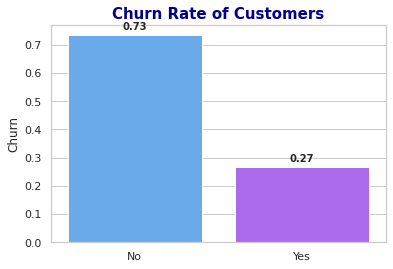

In [ ]:
ax = sns.barplot(x = df['Churn'].value_counts().index.values, y = df['Churn'].value_counts()/len(df['Churn']), data = df,palette= 'cool')
# Iterrating over the bars one-by-one
ax.set_title("Churn Rate of Customers", weight = 'bold',fontdict={'color': 'Darkblue', 'size':15})
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', # horizontally align label at center
                va='center',  weight = 'bold',                      # Vertically align label at center
                   size=10, xytext=(0, 9),
                   textcoords='offset points')

In [ ]:
df["MonthlyCharges"] = df.MonthlyCharges.astype(int)
df['MonthlyCharges'].dtypes

dtype('int64')

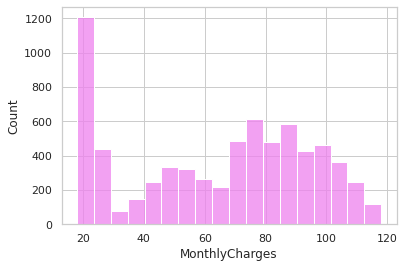

In [ ]:

sns.histplot(df['MonthlyCharges'], color = 'violet')
plt.show()

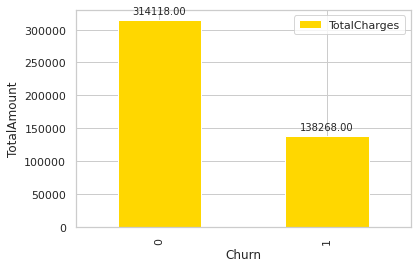

In [ ]:
# monthly charges by customer who churn or not churn
ax = df.groupby("Churn")[['MonthlyCharges']].agg('sum').reset_index().rename(columns = {'MonthlyCharges':'TotalCharges'}).plot(kind  = 'bar', color = ['gold', 'violet'])

for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', # horizontally align label at center
                va='center',                        # Vertically align label at center
                   size=10, xytext=(0, 9),
                   textcoords='offset points')
plt.xlabel("Churn", fontsize = 12)
plt.ylabel("TotalAmount", fontsize = 12)
plt.show()

# Explore categorical Features

In [ ]:
# Remap the values of the dataframe
df['Churn']= df['Churn'].map({'Yes':1, 'No':0})
df.Churn.dtype

dtype('int64')

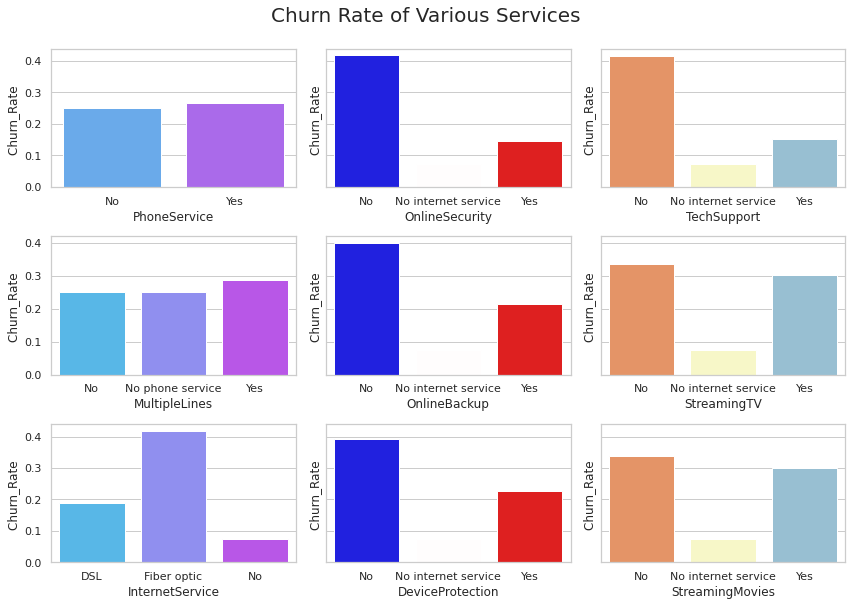

In [ ]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
            'StreamingMovies']  # list of columns that needs to be ploted in single plot

sns.set_theme (context='notebook', style='whitegrid', font='sans-serif', font_scale=1, color_codes=True)
fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (12,8), sharey='row')
for i, item in enumerate(services):
    if i < 3:
        ax = sns.barplot(x = df.groupby(item)[['Churn']].mean().index, y = df.groupby(item)[['Churn']].mean().Churn.values, ax = axes[i,0],  palette= 'cool')
    elif i >=3 and i < 6:

        ax = sns.barplot(x = df.groupby(item)[['Churn']].mean().index, y = df.groupby(item)[['Churn']].mean().Churn.values, ax = axes[i-3, 1], palette= 'seismic')
      
    elif i < 9:
        ax = sns.barplot(x = df.groupby(item)[['Churn']].mean().index, y = df.groupby(item)[['Churn']].mean().Churn.values, ax = axes[i-6,2], palette=  'RdYlBu')

    
    ax.set_ylabel('Churn_Rate ')
    fig.suptitle('Churn Rate of Various Services', x = .50 , y = 1.05, fontsize = 20 )
    plt.tight_layout()

**Internet Service**, The customers who have Fiber optic as internet service are more likely to churn, I normally expect Fiber optic customers to churn less since they use a more premium service. But this can happen due to high prices, competition, customer service, and many other reasons.

**Online Security**, The customer who do not have online security are more likey to churn

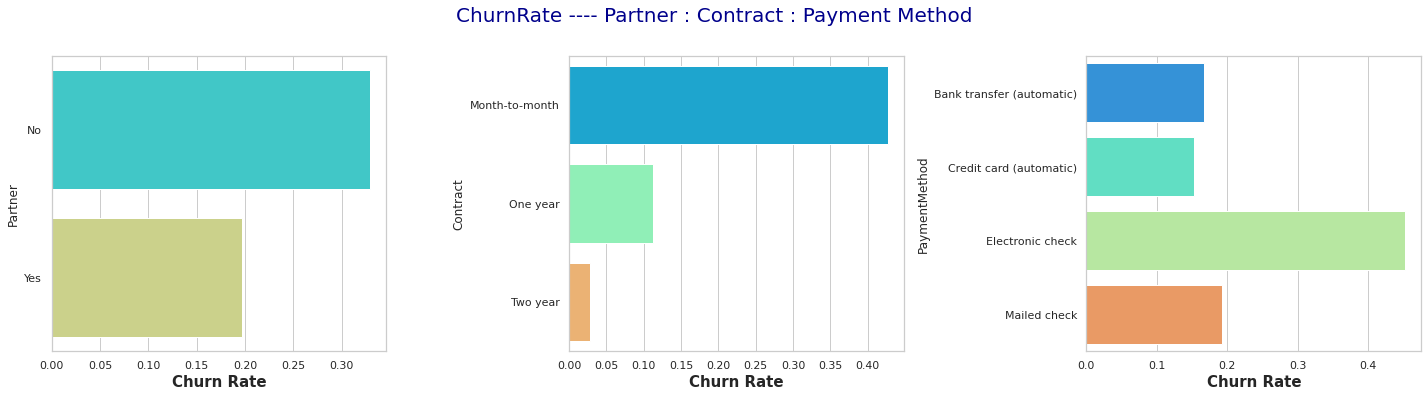

In [ ]:
list2  = ['Partner', 'Contract', 'PaymentMethod'] # list of columns that needs to be ploted in single plot
fig, axes = plt.subplots(nrows = 1,ncols = 3,figsize = (20,5))
for i, item in enumerate(list2):
     if i < 3:
        ax = sns.barplot(y = df.groupby(item)[['Churn']].mean().index, x = df.groupby(item)[['Churn']].mean().Churn.values, ax = axes[i],  palette= 'rainbow')
     fig.suptitle("ChurnRate ---- Partner : Contract : Payment Method", x = 0.5, y = 1.1, fontsize = 20, fontdict = {'color':'Darkblue'})
     ax.set_xlabel("Churn Rate", size = 15, weight = 'bold')
     plt.tight_layout()

**Contract**   People who are on month to month contract are more likely to get churned, and  customer who are having 2 years contract are more loyal customers and less likely to churn.
Customer are taking a longer contract are goint to be  loyal customer for the company

**Payment Method** Customers who have payment method as Electronic Check are more likely to churn and customers with Credit Card(automatic) are less likely to churn and more loyal customers

**Explore Churn by Tenure**

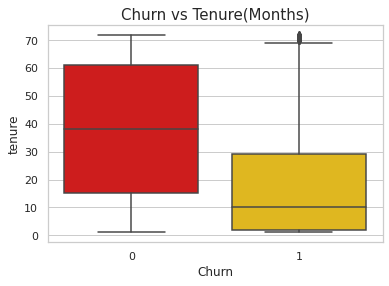

In [ ]:
sns.boxplot(x = df.Churn, y = df.tenure, palette= 'hot' ).set_title("Churn vs Tenure(Months)", size = 15)
plt.show()

**Churn vs Tenure**Customers who are not churning they tend to stay for longer time

**Female and Male who are seniorcitizen**

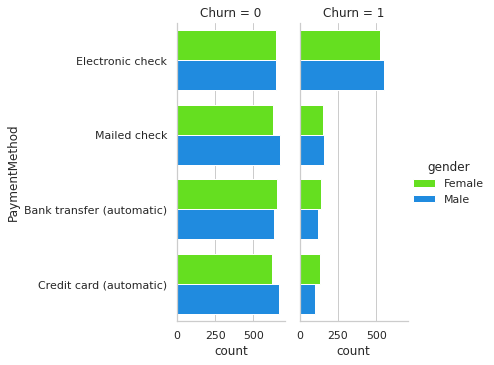

<Figure size 1080x360 with 0 Axes>

In [ ]:
sns.catplot(y="PaymentMethod",   hue="gender", col="Churn", aspect=.6, kind="count",  data=df,palette='gist_rainbow')
plt.figure(figsize=(15, 5))

plt.show()

**Male seniorCitizen who are more likely to churn  tend to stay for longer periord than female senior citizen** 

In [ ]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)

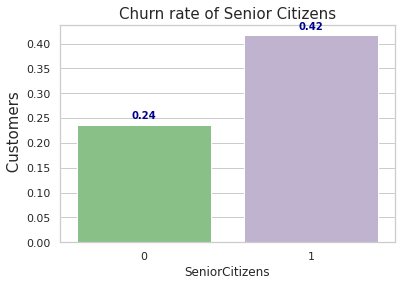

In [ ]:
df3 = df.groupby('SeniorCitizen')[['Churn', 'gender']].mean().reset_index().rename(columns = {'Churn':'ChurnRate'})
ax = sns.barplot(x = df3.SeniorCitizen, y = df3.ChurnRate, palette= 'Accent')

for bar in ax.patches:
  ax.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', # horizontally align label at center
                va='center',                        # Vertically align label at center
                   size=10, xytext=(0, 9),color = 'Darkblue',weight = 'bold',
                   textcoords='offset points')
ax.set_ylabel(' Customers',size = 15)
ax.set_xlabel('SeniorCitizens')
ax.set_title('Churn rate of Senior Citizens',size = 15)
plt.show()
#ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                

** % of Senior Citizen who are churning is double than young people*



**Relationship between MonthlyCharges vs TotalCharges**

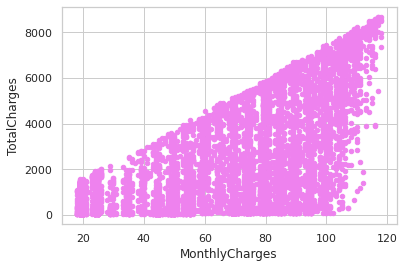

In [ ]:
df[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges', y='TotalCharges', color = 'violet')
plt.show()

**Monthly charges increase also total charges increase**

**Relationship between ChurnRate and Tenure**

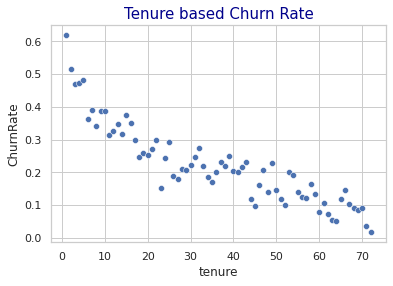

In [ ]:
churn_tenure = df.groupby('tenure').Churn.mean().reset_index().rename(columns = {'Churn':'ChurnRate'})
sns.scatterplot(x ='tenure', y = 'ChurnRate', markers= '*', data = churn_tenure).set_title("Tenure based Churn Rate", size = 15, fontdict = {'color':'Darkblue'})
plt.show()

**As tenure(months the customer stay with company) increases the churnrate of customers decrease**

**Find is there any pattern among Monthly and Total Charges with Customer churn**

#Feature Engineering

Transform our raw features to extract more information from them.  strategy is as follows:

* Group the numerical columns by using k- means Clustering

In [ ]:
# Create a function for order the cluster
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

**K-means on tenure**

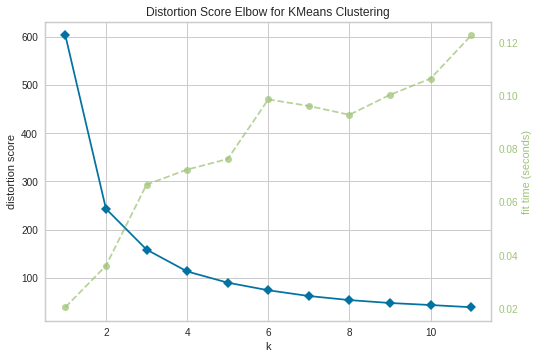

In [ ]:
sse={}
df_cluster = df[['tenure']]
from yellowbrick.cluster import KElbowVisualizer
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(df_cluster)        # Fit the data to the visualizer
visualizer.poof()

** Number of cluster 3 as suggested by elbow method**

In [ ]:
km = KMeans(n_clusters = 3).fit(df[['tenure']])

df['tenure_cluster'] = km.predict(df[['tenure']])

In [ ]:
df = order_cluster('tenure_cluster', 'tenure',df,True)

In [ ]:
df.groupby('tenure_cluster').tenure.describe()

,count,mean,std,min,25%,50%,75%,max
tenure_cluster,,,,,,,,
0,2867.0,7.541332,5.970615,1.0,2.0,6.0,12.0,20.0
1,1926.0,33.854102,8.208706,21.0,26.0,34.0,41.0,48.0
2,2239.0,63.048682,7.478229,49.0,56.0,64.0,70.0,72.0


In [ ]:
df['tenure_cluster'] = df["tenure_cluster"].replace({0:'Low',1:'Mid',2:'High'})


**Monthly Charges Cluster**


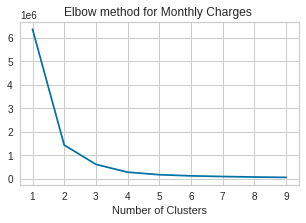

In [ ]:
interia = {}

df_cluster = df[['MonthlyCharges']]
for k in range(1, 10):
  kmeans = KMeans(n_clusters= k, max_iter= 1000).fit(df_cluster)
  df_cluster['clusters'] = kmeans.labels_
  interia[k] = kmeans.inertia_
plt.figure(figsize = (5,3))
plt.plot(list(interia.keys()), list(interia.values()))
plt.xlabel("Number of Clusters")
plt.title("Elbow method for Monthly Charges ")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3).fit(df[['MonthlyCharges']])

df['monthlycharges_cluster'] = kmeans.predict(df[['MonthlyCharges']])

In [ ]:

df = order_cluster('monthlycharges_cluster', 'MonthlyCharges',df,True)

In [ ]:
df.groupby('monthlycharges_cluster').MonthlyCharges.describe()

,count,mean,std,min,25%,50%,75%,max
monthlycharges_cluster,,,,,,,,
0,1888.0,22.949153,5.718865,18.0,19.0,20.0,25.00,42.0
1,2238.0,61.207328,10.453204,43.0,52.0,61.0,70.00,77.0
2,2906.0,93.625602,10.336851,78.0,85.0,93.0,101.75,118.0


In [ ]:
df['monthlycharges_cluster'] = df["monthlycharges_cluster"].replace({0:'Low',1:'Mid',2:'High'})

**TotalCharges Cluster**

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')

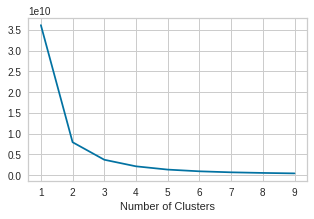

In [ ]:
interia = {}

df_cluster = df[['TotalCharges']]
for k in range(1, 10):
  kmeans = KMeans(n_clusters= k, max_iter= 1000).fit(df_cluster)
  df_cluster['clusters'] = kmeans.labels_
  interia[k] = kmeans.inertia_
plt.figure(figsize = (5,3))
plt.plot(list(interia.keys()), list(interia.values()))
plt.xlabel("Number of Clusters")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters= 3).fit(df[['TotalCharges']])
df['totalcharges_cluster'] = kmeans.predict(df[['TotalCharges']])

In [ ]:
df = order_cluster('totalcharges_cluster', 'TotalCharges', df, True)

In [ ]:
df.groupby('totalcharges_cluster').TotalCharges.describe()

,count,mean,std,min,25%,50%,75%,max
totalcharges_cluster,,,,,,,,
0,4145.0,681.571628,567.841968,18.80,160.85,533.050,1131.50,1955.40
1,1614.0,3247.577664,811.487751,1956.40,2530.65,3187.175,3952.60,4747.65
2,1273.0,6276.091084,1010.606586,4747.85,5443.65,6137.000,7031.45,8684.80


In [ ]:
df['totalcharges_cluster'] = df['totalcharges_cluster'].replace({0:'low', 1:'medium', 2:'high'})

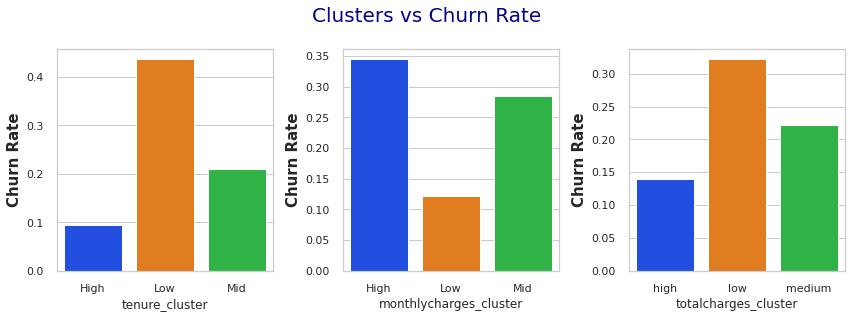

In [ ]:
sns.set_theme(style= 'whitegrid', palette= 'bright')
list3 = ['tenure_cluster','monthlycharges_cluster', 'totalcharges_cluster' ]
fig, axes = plt.subplots(nrows = 1,ncols = 3,figsize = (12,4))
for i, item in enumerate(list3):
     if i < 3:
        ax = sns.barplot(y = df.groupby([item])[['Churn']].mean()['Churn'].to_list(), x = df.groupby([item])[['Churn']].mean()['Churn'].index, ax = axes[i])  #palette= 'rainbow')
     fig.suptitle("Clusters vs Churn Rate", x = 0.5, y = 1.1, fontsize = 20, fontdict = {'color':'Darkblue'})
     ax.set_ylabel("Churn Rate", size = 15, weight = 'bold')
     plt.tight_layout()

**Cluster Observation**

* Churn rate is high when monthly charges are high 
* Churn rate is high when total charges are low
* Churn rate is high when tenure(months) is low

# Predictive Modelling

In [ ]:
le = LabelEncoder()
dummy_col = []

for col in df.columns:
  if df[col].dtype == object:
    if df[col].nunique() == 2:
      # apply label encoder for binary ones
      df[col] = le.fit_transform(df[col])
    else:
      dummy_col.append(col)
# apply get dummies for selected columns
df = pd.get_dummies(data =df, columns = dummy_col)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_cluster_High,tenure_cluster_Low,tenure_cluster_Mid,monthlycharges_cluster_High,monthlycharges_cluster_Low,monthlycharges_cluster_Mid,totalcharges_cluster_high,totalcharges_cluster_low,totalcharges_cluster_medium
0,0,0,1,0,1,0,1,29,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
1,0,0,0,0,10,0,0,29,301.90,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0
2,1,0,0,0,16,1,0,18,326.80,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0
3,1,1,0,0,1,0,1,39,39.65,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
4,1,0,1,0,12,1,0,19,202.25,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0


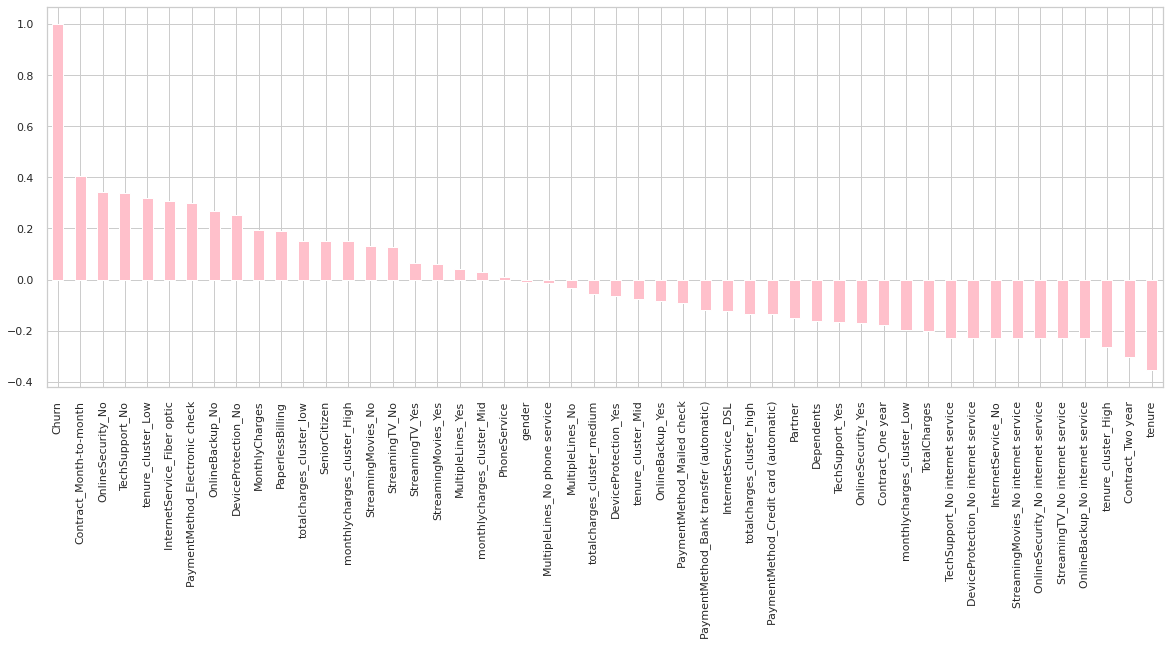

In [ ]:
plt.figure(figsize=(20, 7))
df.corr()['Churn'].sort_values(ascending = False).plot(kind = 'bar', color = 'pink')
plt.show()

**Observation**

High churn in case of month-month contract, online security, tech-support, interet fiber optic, online backup

Churn and Contract two year are highly negtively correlated, 
Churn and Contract online security, streaming movies, tech-support device protection with no internet service are highly negtively correlated, 

Muliple lines, gender and availability of phone service have no effect.


In [ ]:
df.to_csv("/content/drive/MyDrive/project/Project_ChurnPrediction/Notebooks and Data/Data/clean_churn.csv")

In [ ]:
df.shape

(7032, 50)